In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from reference import get_file_names

In [2]:
# get the col reference table
df_ref = pd.read_csv('./vidas_data/cross_ref_cols_tabs.csv')
# df_ref.head()

In [68]:
# get the data frame giving the list of IDEHRs who have passed
get_file_names(['IDEHR', 'EHRType', 'IDDecesso'], df_ref)

['wH_DirectTable_Decesso', 'wH_DirectTable_C_Decesso']

In [49]:
# get the data frame giving the list of IDEHRs with the start date of hospitalization
get_file_names(['IDEHR', 'EHRType', 'TimeStamp_Insert'], df_ref)

['wH_DirectTable_PAI_VIDAS',
 'wH_Stats_CC_EHR_OpenLog',
 'wH_DirectTable_C_DOLORE_OSS_VIDAS',
 'wH_DirectTable_C_CAM',
 'wH_DirectTable_C_VISITA_PSI_VIDAS',
 'wH_DirectTable_DOLORE_OSS_VIDAS',
 'wH_DirectTable_DOLORE_MED_e_INF_VIDAS',
 'wH_DirectTable_CR_RISCHIO_LESIONI',
 'wH_DirectTable_Scala_di_Barthel',
 'wH_DirectTable_ASSOC_ON_FUNEBRI',
 'wH_DirectTable_R_SCALE_PPI',
 'wH_DirectTable_VISITA_PSI_VIDAS',
 'wH_DirectTable_BCP_generale',
 'wH_DirectTable_C_ASSOC_ON_FUNEBRI',
 'wH_DirectTable__S_VMD_FLUSSI_',
 'wH_DirectTable_VISITA_FKT_VIDAS',
 'wH_DirectTable_Dati_Integrativi_SDO',
 'wH_DirectTable_Scala_di_Bernardini',
 'wH_Stats_EHR_DT_PrintLog',
 'wH_DirectTable_Studio_NEVI_Criteri_',
 'wH_DirectTable_DIAGNOSI_ICD',
 'wH_DirectTable_XX_VISITA_INF_VIDAS',
 'wH_DirectTable_C_ANAMNESI_MED',
 'wH_DirectTable_Valutazione_famiglia',
 'wH_DirectTable_R_KPS',
 'wH_DirectTable_C_COLLOQUIO_MED',
 'wH_DirectTable_SPORTELLO_DAT',
 'wH_DirectTable_C_VISITA_MED_VIDAS',
 'wH_DirectTable_C_DIAG

In [61]:
# get the data frame giving the list of IDEHRs with the diagnosis
get_file_names(['IDEHR', 'EHRType', 'IDDIAGNOSI_ICD'], df_ref)

['wH_DirectTable_DIAGNOSI_ICD', 'wH_DirectTable_C_DIAGNOSI_ICD']

In [69]:
# data frame with deathID
df_death = pd.read_csv('./vidas_data/wH_DirectTable_Decesso.csv', parse_dates=['Data'])
df_death = df_death[['IDEHR', 'Data', 'EHRType']].drop_duplicates(subset=['IDEHR'], keep='first')
print(df_death.shape)
df_death.head()

(5935, 3)


,IDEHR,Data,EHRType
0,4,2015-01-09 16:15:00,EHR
1,1022,2015-01-11 00:15:00,EHR
2,16,2015-01-15 01:45:00,EHR
3,1025,2015-01-15 06:44:00,EHR
4,6,2015-01-20 14:50:00,EHR


In [70]:
# check NaNs
df_death.isna().sum()

IDEHR       0
Data       54
EHRType     0
dtype: int64

In [71]:
# data frame with start of hospitalization
df_soh = pd.read_csv('./vidas_data/wH_DigitalSign_DigSigDoc.csv', parse_dates=['TimeStamp_Insert'])
print(df_soh.shape)
df_soh = df_soh[['IDEHR', 'EHRType', 'TimeStamp_Insert']].drop_duplicates(subset=['IDEHR'], keep='first')
print(df_soh.shape)
df_soh.head()

C:\Users\prate\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(2157301, 50)
(18903, 3)


,IDEHR,EHRType,TimeStamp_Insert
0,1,AMB,2014-12-30 10:52:57.653
6,3,AMB,2014-12-30 11:12:01.570
8,7,AMB,2014-12-30 11:18:06.063
10,10,AMB,2014-12-30 11:22:52.020
14,13,AMB,2014-12-30 11:27:28.030


In [72]:
# check NaNs
df_soh.isna().sum()

IDEHR               0
EHRType             0
TimeStamp_Insert    0
dtype: int64

In [73]:
# data frame with diagnosis
df_diag = pd.read_csv('./vidas_data/wH_DirectTable_DIAGNOSI_ICD.csv')
df_diag = df_diag[['IDEHR', 'I_ICD', 'EHRType']].drop_duplicates(subset=['IDEHR'], keep='first')
print(df_diag.shape)
df_diag.head()

(8224, 3)


C:\Users\prate\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (23,24,42,43,44,62,63,64) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,IDEHR,I_ICD,EHRType
0,3339,1629 - Tumori maligni del bronco o polmone - ...,AMB
1,1402,NaN,AMB
2,3170,1749 - Tumori maligni della mammella (della do...,AMB
3,2885,1428 - Tumori maligni di altre ghiandole saliv...,AMB
4,3017,1749 - Tumori maligni della mammella (della do...,AMB


In [74]:
# check NaNs
df_diag.isna().sum()

IDEHR       0
I_ICD      47
EHRType     0
dtype: int64

In [75]:
df_diag = df_diag.dropna()
print(df_diag.shape)
df_diag.isna().sum()

(8177, 3)


IDEHR      0
I_ICD      0
EHRType    0
dtype: int64

In [76]:
# df_diag.diagnosi.value_counts()

In [85]:
# do the merge
from functools import reduce
dfs = [df_death, df_soh, df_diag]
df_referral = reduce(lambda left, right: pd.merge(left, right, on=['IDEHR', 'EHRType']), dfs)

In [86]:
df_referral

,IDEHR,Data,EHRType,TimeStamp_Insert,I_ICD
0,3263,2015-10-02 07:50:00,AMB,2015-09-21 10:00:18.743,1550 - Tumori maligni primitivi del fegato#2048
1,2904,NaT,AMB,2015-09-04 14:53:01.400,1550 - Tumori maligni primitivi del fegato#2048
2,3339,NaT,AMB,2015-09-23 15:11:20.817,1629 - Tumori maligni del bronco o polmone - ...
3,3394,2015-10-06 03:25:00,AMB,2015-09-25 18:17:56.940,1629 - Tumori maligni del bronco o polmone - ...
4,3417,2015-10-05 15:00:00,AMB,2015-09-28 17:26:59.413,1739 - Altri tumori maligni della cute - sede...
...,...,...,...,...,...
4511,5281,2020-07-23 09:55:00,EHR,2020-07-17 12:37:32.397,1500 - Tumori maligni dell'esofago cervicale#2...
4512,27907,2020-07-23 11:00:00,AMB,2020-04-23 14:32:41.760,"1629 - Tumori maligni del bronco o polmone, no..."
4513,28540,2020-07-23 01:45:22,AMB,2020-05-27 08:46:34.090,1536 - Tumori maligni del colon ascendente#2039
4514,29440,2020-07-23 15:36:43,AMB,2020-07-21 09:21:33.733,"1629 - Tumori maligni del bronco o polmone, no..."


In [87]:
# get the survival time (in days) for each patient
df_referral['survival_time_days'] = pd.to_timedelta(df_referral['Data'] - df_referral['TimeStamp_Insert']).dt.days
df_referral.head()

,IDEHR,Data,EHRType,TimeStamp_Insert,I_ICD,survival_time_days
0,3263,2015-10-02 07:50:00,AMB,2015-09-21 10:00:18.743,1550 - Tumori maligni primitivi del fegato#2048,10.0
1,2904,NaT,AMB,2015-09-04 14:53:01.400,1550 - Tumori maligni primitivi del fegato#2048,NaN
2,3339,NaT,AMB,2015-09-23 15:11:20.817,1629 - Tumori maligni del bronco o polmone - ...,NaN
3,3394,2015-10-06 03:25:00,AMB,2015-09-25 18:17:56.940,1629 - Tumori maligni del bronco o polmone - ...,10.0
4,3417,2015-10-05 15:00:00,AMB,2015-09-28 17:26:59.413,1739 - Altri tumori maligni della cute - sede...,6.0


In [88]:
print(df_referral.shape)
df_referral.survival_time_days.value_counts()

(4516, 6)


5.0      171
2.0      160
3.0      160
4.0      153
1.0      149
        ... 
307.0      1
353.0      1
571.0      1
450.0      1
782.0      1
Name: survival_time_days, Length: 306, dtype: int64

In [89]:
print(df_referral.isna().sum())
df_referral = df_referral.dropna()

IDEHR                  0
Data                  52
EHRType                0
TimeStamp_Insert       0
I_ICD                  0
survival_time_days    52
dtype: int64


In [90]:
# translate the diagnosis to English
# from googletrans import Translator
# df_referral['Diagnosis'] = df_referral.Diagnosi.str.findall('(.+)#').to_frame()
# df_referral['Diagnosis'] = df_referral['Diagnosis'].apply(lambda x: x if isinstance(x, float) else x[0])

# translator = Translator()
# df_referral['Diagnosi'] = df_referral['Diagnosis'].apply(translator.translate, src='it', dest='en').apply(getattr, args=('text',))
# df_referral = df_referral.drop(columns = ['Diagnosis'])
# df_referral.head()

In [91]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_width()
        ax.annotate('{}'.format(height),
                    xy=(height, rect.get_y()),
                    xytext=(30, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [92]:
with pd.option_context("display.max_rows", 1000):
    print(df_referral.survival_time_days.value_counts())

 5.0       171
 2.0       160
 3.0       160
 4.0       153
 1.0       149
 9.0       125
 6.0       124
 8.0       118
 7.0       118
 10.0      108
 11.0      104
 15.0      101
 12.0       99
 13.0       88
 14.0       85
 16.0       78
 17.0       76
 19.0       73
 18.0       73
 0.0        73
 22.0       72
 24.0       67
 23.0       66
 26.0       62
 21.0       57
 20.0       57
 28.0       55
 25.0       52
 29.0       48
 27.0       45
 31.0       44
 30.0       44
 37.0       41
 35.0       38
 46.0       37
 38.0       37
 36.0       35
 32.0       35
 34.0       34
 40.0       32
 45.0       32
 33.0       31
 44.0       30
 47.0       29
 39.0       29
 42.0       27
 41.0       26
 50.0       26
 57.0       26
 43.0       26
 48.0       20
 55.0       19
 49.0       19
 56.0       19
 61.0       18
 62.0       18
 51.0       18
 79.0       17
 59.0       17
 70.0       16
 58.0       16
 52.0       15
 53.0       15
 64.0       14
 63.0       14
 60.0       13
 66.0     

In [93]:
# print('Mean Survival (using index): ', np.mean(df_referral.survival_time_days.value_counts())) # this just gives the mean of the days (not counting the number of times that day occurs)
# print('Survival Stddev (using index): ', np.std(df_referral.survival_time_days.value_counts().index, ddof=0))
print('Mean Survival: ', np.mean(df_referral.survival_time_days))
print('Survival Stddev: ', np.std(df_referral.survival_time_days, ddof=0))

Mean Survival:  41.92383512544803
Survival Stddev:  72.97699056769135


<Figure size 1440x720 with 0 Axes>

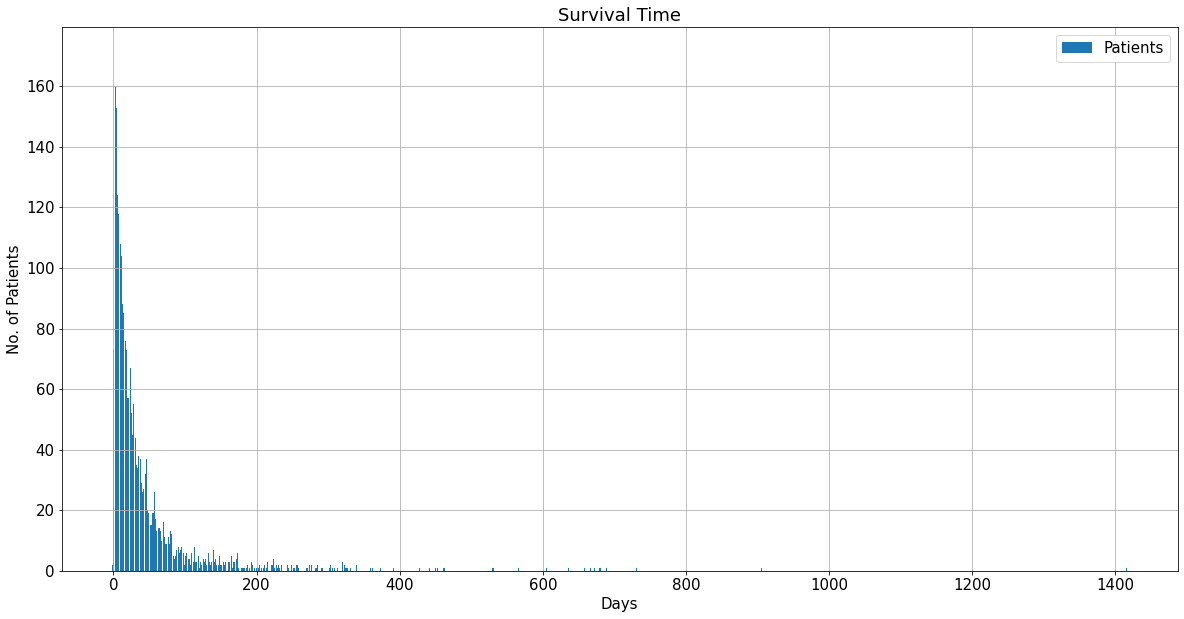

In [94]:
# get the survival time histogram for all patients
plt.rcParams['figure.figsize'] = [20, 10]
matplotlib.rcParams.update({'font.size': 15})
plt.figure()
labels = df_referral['survival_time_days'].value_counts().index
survival = df_referral['survival_time_days'].value_counts(normalize=False)
fig, ax = plt.subplots()
bar1 = ax.bar(labels, survival, label='Patients')
ax.set_xlabel('Days')
ax.set_ylabel('No. of Patients')
ax.set_title('Survival Time')
ax.legend()
plt.grid()
plt.savefig("./graphs/referral analysis/survival_time.png")
plt.show()

In [95]:
# get the survival time histogram for patients in each diagnosis
df_survival = df_referral[['I_ICD', 'survival_time_days']].groupby(by=['I_ICD']).mean()
df_survival_stddev = df_referral[['I_ICD', 'survival_time_days']].groupby(by=['I_ICD']).std(ddof=0)

In [96]:
df_survival

,survival_time_days
I_ICD,
001 - Cure Palliative#2005,67.714286
0010 - Colera da vibrio cholerae#2005,138.000000
0010 - Colera da vibrio cholerae#2005=0,463.000000
002 - Terapia del dolore#2006,77.000000
042 - Infezione da virus della immunodeficienza umana (HIV)#2823=0,1.000000
...,...
V1303 - Anamnesi personale di sindrome nefrosica#4500,69.000000
V667 - Cure palliative#2402,64.000000
V667 - Cure palliative#2402=0,15.045455


In [98]:
df_survival_stddev = df_survival_stddev.rename(columns={"survival_time_days": "survival_stddev"})
df_surv = pd.merge(df_survival, df_survival_stddev, on='I_ICD').reset_index()
df_surv

,I_ICD,survival_time_days,survival_stddev
0,001 - Cure Palliative#2005,67.714286,93.966125
1,0010 - Colera da vibrio cholerae#2005,138.000000,0.000000
2,0010 - Colera da vibrio cholerae#2005=0,463.000000,0.000000
3,002 - Terapia del dolore#2006,77.000000,0.000000
4,042 - Infezione da virus della immunodeficienz...,1.000000,0.000000
...,...,...,...
615,V1303 - Anamnesi personale di sindrome nefrosi...,69.000000,0.000000
616,V667 - Cure palliative#2402,64.000000,22.000000
617,V667 - Cure palliative#2402=0,15.045455,17.649304
618,V667 - Trattamento per cure palliative#2402,83.200000,65.480990


In [101]:
# should be possible to clean up the 'I_ICD' column into different cancer groupings

In [102]:
# from googletrans import Translator
# df_surv['Diagnosis'] = df_surv.I_ICD.str.findall('(.+)#').to_frame()
# df_surv['Diagnosis'] = df_surv['Diagnosis'].apply(lambda x: x if isinstance(x, float) else x[0])

# translator = Translator()
# df_surv['I_ICD'] = df_surv['Diagnosis'].apply(translator.translate, src='it', dest='en').apply(getattr, args=('text',))
# df_surv = df_surv.drop(columns = ['Diagnosis']).sort_values(by='survival_time_days', ascending=False)
# df_surv

In [103]:
# plt.rcParams['figure.figsize'] = [20, 18]
# matplotlib.rcParams.update({'font.size': 15})
# plt.figure()
# labels = df_surv['Diagnosi']
# survival = df_surv['survival_time_days']
# errors = df_surv['survival_stddev']
# fig, ax = plt.subplots()
# bar1 = ax.barh(labels, survival, label='Survival Time (in Days)', xerr=errors)
# ax.set_xlabel('Days')
# ax.set_ylabel('Diagnosis')
# ax.set_title('Survival Time')
# ax.legend()
# plt.grid()
# plt.savefig("./graphs/referral analysis/survival_time_diagnosis.png")
# plt.show()

In [104]:
# generate a box and whisker plot
# plt.rcParams['figure.figsize'] = [10, 10]
# plt.figure()
# fig, ax = plt.subplots()
# ax.set_ylabel('Days')
# ax.set_title('Survival Time')
# df_referral.boxplot(column=['survival_time_days'], showfliers=False)

In [105]:
# boxplot with outliers
# plt.rcParams['figure.figsize'] = [10, 10]
# plt.figure()
# fig, ax = plt.subplots()
# ax.set_ylabel('Days')
# ax.set_title('Survival Time')
# df_referral.boxplot(column=['survival_time_days'])

In [106]:
# First Definition: Split patients into early/late referral by using the criteria of +- 2 stddev for each diagnosis
